最小費用流問題アプリケーション

find the way

ノード数を入力: 3
ノードリストをスペース区切りで入力: 1 2 3
各ノードのデマンドをスペース区切りで入力: -9 0 9
エッジ数を入力: 3
0エッジの始点と終点をスペース区切りで入力: 1 2
1エッジの始点と終点をスペース区切りで入力: 2 3
2エッジの始点と終点をスペース区切りで入力: 1 3
各エッジの容量をスペース区切りで入力: 5 5 5
各エッジのコストをスペース区切りで入力: 5 5 5
最小費用流:  65
最小費用:  {1: {2: 4, 3: 5}, 2: {3: 4}, 3: {}}


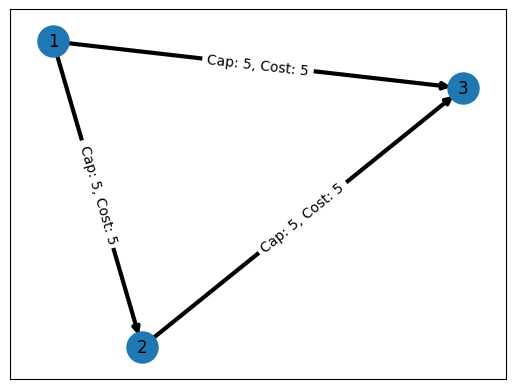

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフを作成
G = nx.DiGraph()

# エッジを追加関数
def add_edge(G, u, v, capacity, cost):
    G.add_edge(u, v, capacity=capacity, weight=cost)

# ノードとエッジの情報を入力として受け取ります
node_count = int(input("ノード数を入力: "))
nodes = list(map(int, input("ノードリストをスペース区切りで入力: ").split()))
demands = list(map(int, input("各ノードのデマンドをスペース区切りで入力: ").split()))
edge_count = int(input("エッジ数を入力: "))
edges = [tuple(map(int, input(str(_)+"エッジの始点と終点をスペース区切りで入力: ").split())) for _ in range(edge_count)]
capacities = list(map(int, input("各エッジの容量をスペース区切りで入力: ").split()))
costs = list(map(int, input("各エッジのコストをスペース区切りで入力: ").split()))

# ノードとエッジをグラフに追加
for node in nodes:
    G.add_node(node,demand=0)

for edge, capacity, cost in zip(edges, capacities, costs):
    add_edge(G, edge[0], edge[1], capacity, cost)

for i in range(len(demands)):
    G.nodes[i+1]['demand'] = demands[i] #各ノードのデマンドを追加 負は提供量　正は需給量

# 最小費用流を計算
flowDict, cost = nx.network_simplex(G)
#mincostflow = nx.min_cost_flow(G)
print("最小費用: ", flowDict)
print("最小費用流: ", cost)

# グラフを描画
pos = nx.spring_layout(G)
labels = {edge: f'Cap: {G[edge[0]][edge[1]]["capacity"]}, Cost: {G[edge[0]][edge[1]]["weight"]}' for edge in G.edges()}

#nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue")
nx.draw_networkx_nodes(G, pos, node_size=500) #ノードを描画
nx.draw_networkx_edges(G, pos, width=3) #エッジを描画
nx.draw_networkx_labels(G, pos) #（ノードの）ラベルを描画
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# describe interpersonal relationships

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities

# Create an empty graph to represent interpersonal relationships
G = nx.Graph()

def add_relationship(person1, person2):
    """
    Function to add a relationship between two people.
    """
    G.add_edge(person1, person2)

def save_relationships_to_gml(filename):
    """
    Function to save the interpersonal relationships to a GML file.
    """
    nx.write_gml(G, filename)

def main():
    while True:
        print("人間関係記録")
        print("1. Add Relationship")
        print("2. Save to GML")
        print("3. Read the Relationship Map")
        print("4. Draw the Relationship Map")
        print("5. Quit")

        choice = input("Enter your choice: ")

        if choice == "1":
            person1 = input("Enter the name of the first person: ")
            person2 = input("Enter the name of the second person: ")
            add_relationship(person1, person2)
        elif choice == "2":
            filename = input("Enter the filename to save to (e.g., relationships.gml): ")
            save_relationships_to_gml(filename)
            print(f"Interpersonal relationships saved to {filename}")
        elif choice == "3":
            map = input("Enter the name of the gml file: ")
            G=nx.readwrite.gml.read_gml(map,  label = 'label')
        elif choice == "4":
            map = input("Enter the name of the gml file: ")
            G=nx.readwrite.gml.read_gml(map,  label = 'label')
            pos = nx.spring_layout(G)
            lst_l = label_propagation_communities(G)
            color_map_l = ['green'] * nx.number_of_nodes(G)
            nodename=list(G.nodes())
            counter = 0
            nx.draw_networkx_edges(G, pos)
            nx.draw_networkx_nodes(G, pos, node_color=color_map_l)
            nx.draw_networkx_labels(G, pos)
            plt.axis('off')
            plt.show()
            break

        elif choice == "5":
            break
        else:
            print("失敗した失敗した失敗した失敗した失敗した")

if __name__ == "__main__":
    main()


人間関係記録
1. Add Relationship
2. Save to GML
3. Read the Relationship Map
4. Draw the Relationship Map
5. Quit
人間関係記録
1. Add Relationship
2. Save to GML
3. Read the Relationship Map
4. Draw the Relationship Map
5. Quit


中心性計算

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.community import kernighan_lin_bisection
map = input("Enter the name of the gml file: ")
G = nx.read_gml(map)
# 次数中心性が高い人
top_degree_centrality = max(nx.degree_centrality(G))
print("次数中心性が高い人:", top_degree_centrality)


Enter the name of the gml file: map.gml
次数中心性が高い人: skye
